In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp "/content/drive/MyDrive/food_energy_detection/requeriment.txt" ./requeriment.txt

In [ ]:
!pip install -r requeriment.txt
!pip install "pillow<7.0.0"

     |████████████████████████████████| 591.8MB 31kB/s 
     |████████████████████████████████| 61kB 8.7MB/s 
     |████████████████████████████████| 92kB 13.3MB/s 
     |████████████████████████████████| 163kB 61.0MB/s 
     |████████████████████████████████| 81kB 9.3MB/s 
  Created wheel for typing: filename=typing-3.7.4.3-cp36-none-any.whl size=26307 sha256=32c9a6176f5149b771f9e9f5c1276f1e34602f1366f3b9c93b7b19be874adcf1
  Stored in directory: /root/.cache/pip/wheels/2d/04/41/8e1836e79581989c22eebac3f4e70aaac9af07b0908da173be
Successfully built typing
  Found existing installation: torch 1.7.0+cu101
    Uninstalling torch-1.7.0+cu101:
      Successfully uninstalled torch-1.7.0+cu101
  Found existing installation: torchvision 0.8.1+cu101
    Uninstalling torchvision-0.8.1+cu101:
      Successfully uninstalled torchvision-0.8.1+cu101
  Found existing installation: Flask 1.1.2
    Uninstalling Flask-1.1.2:
      Successfully uninstalled Flask-1.1.2
  Found existing installation: fastai

In [1]:
import pandas as pd
import requests
import glob
from io import BytesIO
import numpy as np
import os
import shutil
import pprint
import json


In [2]:
from fastai import *
from fastai.vision import *

# Retrieving Data

Run the below commands  if you need to fetch the data.


# Load Data

The data is stored in the "data" folder; one directory above.     
Each of the 101 food categores is stored in its own folder

The first 5 of the 101 categories

In [5]:
!tar -xf "/content/drive/MyDrive/food_energy_detection/food-110.tar.gz" -C /content/

In [ ]:
!ls ./images | head -n 5

apple_pie
baby_back_ribs
baklava
barbecue
bean_curd


read the images 

In [6]:
path = Path('./images')

In [7]:
default_transforms = get_transforms()

In [18]:
def get_ex(filepath):
    return open_image(filepath)

def plots_f(rows, cols, width, height, filepath, **kwargs):
    # code to apply transformation function multiple times
    [get_ex(filepath).apply_tfms(data.train_ds.tfms, **kwargs).show(ax=ax) for i, ax in enumerate(plt.subplots(
                                                                        rows, cols, figsize=(width, height))[1].flatten())]

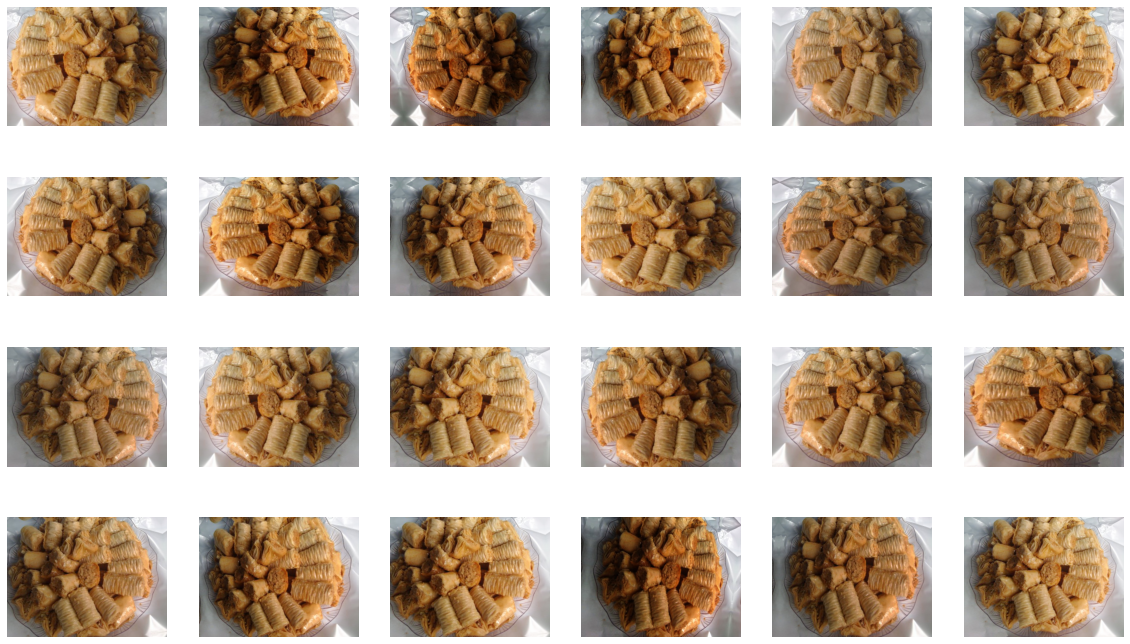

In [21]:
plots_f(4, 6, 20, 12, "/content/images/baklava/176061.jpg")

In [17]:
data = ImageDataBunch.from_folder(path, valid_pct=0.2,
        ds_tfms=get_transforms(), size=224, num_workers=8, bs=64).normalize(imagenet_stats)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpolate/upsample with float scale_factor changed "
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:3103: UserWarning: The default behavior for interpolate/upsample with float scale_factor changed in 1.6.0 to align with other frameworks/libraries, and now uses scale_factor directly, instead of relying on the computed output size. If you wish to restore the old behavior, please set recompute_scale_factor=True. See the documentation of nn.Upsample for details. 
  warnings.warn("The default behavior for interpola

In [ ]:
def plots_f_indiv(idx, rows, cols, width, height, **kwargs):
    # code to apply specific transformation multiple times
    [get_ex().apply_tfms(data.train_ds.tfms[idx], **kwargs).show(ax=ax) for i, ax in enumerate(plt.subplots(
                                                                        rows, cols, figsize=(width, height))[1].flatten())]

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['apple_pie',
  'baby_back_ribs',
  'baklava',
  'barbecue',
  'bean_curd',
  'beef_carpaccio',
  'beef_tartare',
  'beet_salad',
  'beignets',
  'bibimbap',
  'bread_pudding',
  'breakfast_burrito',
  'bruschetta',
  'caesar_salad',
  'cannoli',
  'caprese_salad',
  'carrot_cake',
  'ceviche',
  'cheese_plate',
  'cheesecake',
  'chicken_curry',
  'chicken_quesadilla',
  'chicken_wings',
  'chocolate_cake',
  'chocolate_mousse',
  'churros',
  'clam_chowder',
  'club_sandwich',
  'crab_cakes',
  'creme_brulee',
  'croque_madame',
  'cup_cakes',
  'deviled_eggs',
  'donuts',
  'dumplings',
  'edamame',
  'eggs_benedict',
  'escargots',
  'falafel',
  'filet_mignon',
  'fired_rice',
  'fish_and_chips',
  'foie_gras',
  'french_fries',
  'french_onion_soup',
  'french_toast',
  'fried_calamari',
  'fried_chicken',
  'fried_rice',
  'frozen_yogurt',
  'garlic_bread',
  'glutinous_rice_balls',
  'gnocchi',
  'greek_salad',
  'grilled_cheese_sandwich',
  'grilled_salmon',
  'guacamole',
  

## Train Model

# Initialize Rest

In [ ]:
learn = create_cnn(data, models.resnet34, metrics=error_rate,pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 88728522.40it/s]


In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
torch.backends.cudnn.benchmark = False

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


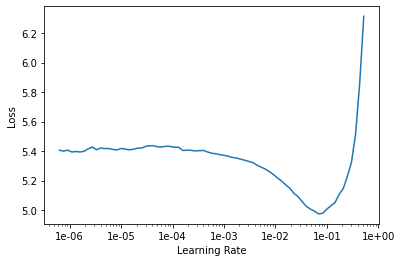

In [ ]:
learn.lr_find()
learn.recorder.plot()

In [ ]:
#learn = create_cnn(data, models.resnet34, metrics=error_rate, model_dir="../../prod")
#learn.model = torch.nn.DataParallel(learn.model)


In [ ]:
lr = 1e-2

In [ ]:
learn.fit_one_cycle(8 , lr)

epoch,train_loss,valid_loss,error_rate
1,2.469273,1.998720,0.507814
2,2.354211,2.491208,0.615992
3,2.194572,2.232458,0.558792
4,2.020320,1.853422,0.475649
5,1.764465,1.593814,0.416325
6,1.581481,1.410483,0.372478
7,1.379328,1.331550,0.345926
8,1.256150,1.313411,0.341526


In [ ]:
!cp -r "/content/drive/MyDrive/food_energy_detection/models" ./images/models

In [ ]:
model_name="resnet34"

In [ ]:
learn.save(f'{model_name}-stage-1')

In [ ]:
learn.load(f'{model_name}-stage-1')

Learner(data=ImageDataBunch;

Train: LabelList
y: CategoryList (26365 items)
[Category fired_rice, Category fired_rice, Category fired_rice, Category fired_rice, Category fired_rice]...
Path: images
x: ImageItemList (26365 items)
[Image (3, 512, 384), Image (3, 384, 512), Image (3, 384, 512), Image (3, 512, 512), Image (3, 384, 512)]...
Path: images;

Valid: LabelList
y: CategoryList (6591 items)
[Category risotto, Category cannoli, Category pulled_pork_sandwich, Category oysters, Category zongzi]...
Path: images
x: ImageItemList (6591 items)
[Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 512), Image (3, 512, 384)]...
Path: images;

Test: None, model=Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=Fal

In [ ]:
learn.unfreeze()


In [ ]:
learn.lr_find(start_lr=1e-09, end_lr=1e-3)

epoch,train_loss,valid_loss,error_rate


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


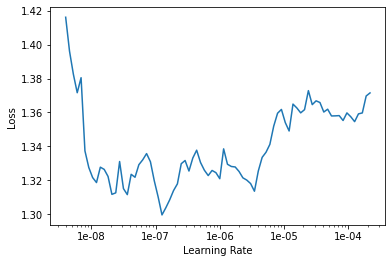

In [ ]:
learn.recorder.plot(skip_end=10)


In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-8,1e-4))

epoch,train_loss,valid_loss,error_rate
1,1.328877,0.992858,0.265665
2,1.324341,0.992652,0.265514
3,1.339978,0.996340,0.267334
4,1.277852,0.991669,0.266424
5,1.331810,0.992760,0.265817


In [ ]:
learn.save(f'{model_name}-stage-2')
learn.save(f'{model_name}-stage-2', True)
!cp -r ./images/models, "/content/drive/MyDrive/food_energy_detection/models=2"

cp: cannot stat './images/models,': No such file or directory


In [ ]:
learn.load(f'{model_name}-stage-2');